# Experiments with the frequency-multiplexed brain-activity data

In [1]:
%pylab inline 
import networkx as nx
import scipy.io
from scipy.linalg import block_diag
from scipy import sparse
import matplotlib.colors as colors



from MMC_util import *
from MMC_plot_util import *
from MMC_neuro_util import *

Populating the interactive namespace from numpy and matplotlib


# Load multiplex brain network

In [2]:
data_load_specs = {'file_name':'data/Guillon2017.mat',
              'self_edges':False,# no self edges
              'unweighted':False,# weighted adjacency matrices
              'degree_sort':True} # order the nodes from most edges to fewest edges

Peoples_As,N,I = load_mat_file(data_load_specs)

## Visualize the 7 intralayer adjacency matrices for persons 10 and 40


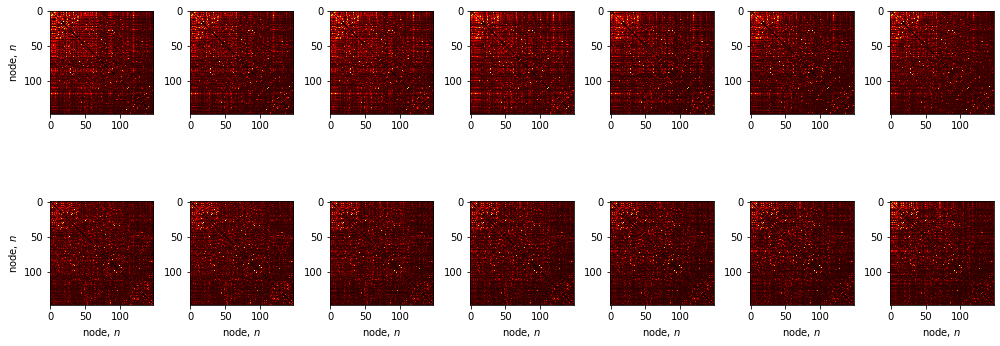

In [3]:
plot_As(Peoples_As,[10,45])

## Study intralayer degrees

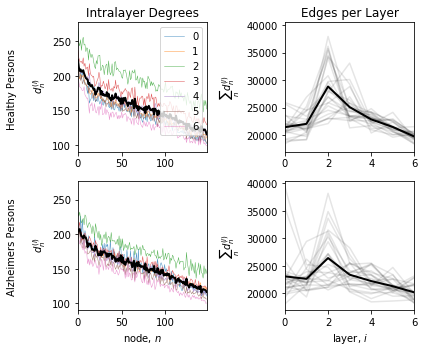

In [4]:
Degrees = get_degrees(Peoples_As)#node degrees for each person, each node, and each layer
plot_degrees(Degrees)

## Study optimal imbalance and convergence rate

In [ ]:
a_s =  [.99,.9,.5,.1,.01] # a is the rate for interlayer transitions within the interlayer Markov chains [1-a,a; a,1-a]
ws = linspace(.001,.999,21)
funs = [get_chain_Pts,get_increasing_Pts,get_decreasing_Pts,get_random_Pts]
As = Peoples_As[0]
alpha=1
convs,tots,imb_opts,conv_opts = get_optimal_curves(ws,a_s,funs,As,alpha)

In [ ]:
def plot_optimals2(ws,a_s,funs,convs,tots,exp_names):

    f, (ax1,ax2) = plt.subplots(2,len(funs),figsize=(7,3),sharex='col',sharey='row')
    strr = ['-','--',':','-.','-']

    for tt in range(len(funs)):    
        for t in range(len(a_s)):
            
            ax2[tt].plot(ws,convs[tt][t],strr[t],linewidth='2')
            ax1[tt].plot(ws,tots[tt][t],strr[t],linewidth='2')
            plt.xlim([0,1])
            #plt.ylim([0,.03])            

    ax1[0].set_ylabel('$||\Delta||_{F}$')
    ax2[0].set_ylabel('$\lambda_2(\omega)$')

    for t in range(len(funs)): 
        ax1[t].set_title(exp_names[t])
        ax2[t].set_xlabel('$\omega$')
        ax2[t].set_xlim([0,1])
        ax2[t].set_ylim([.9,1])     
        ax1[t].set_xlim([0,1])
        #ax1[t].set_ylim([0,.035])    

    #ax1[0].legend(['$a='+str(a)+'$' for a in a_s],loc='lower center')

    #subplot(2,3,4)
    #text(-4.25, 0.35, '(A)',size=14)
    #text(-4.25, 0.05, '(B)',size=14)


    plt.tight_layout()
    plt.legend(['$a='+str(a)+'$' for a in a_s],loc='lower center',bbox_to_anchor=(-1.3, -0.9), shadow=True, ncol=len(a_s));
    
    
    return f,ax1,ax2

In [ ]:
exp_names = ['Identical $a_n$','Increasing $a_n$','Decreasing $a_n$','Random $a_n$']
plot_optimals2(ws,a_s,funs,convs,tots,exp_names)

plt.legend(['$a='+str(a)+'$' for a in a_s],loc='lower center',bbox_to_anchor=(-1.3, -0.9), shadow=True, ncol=len(a_s));
plt.savefig('figs/optimum_neuro.pdf')

In [ ]:
def plot_optimals_SM2(a_s2,imb_opts,conv_opts,exp_names):
    f1 = figure(figsize=(8,2.9))

    yrange = [.4,.8]
    strr = ['o','s','<','x']
    subplot(1,3,1)
    for i in range(len(conv_opts)):plt.scatter(a_s2,imb_opts[i],marker=strr[i],s=20,alpha=0.75);
    plt.legend(exp_names)    
    plt.title('Imbalance')
    plt.xlabel('$a$')
    #plt.ylim(yrange)
    plt.ylabel('$\omega^*_{\Delta}$')

    subplot(1,3,2)
    for i in range(len(conv_opts)):plt.scatter(a_s2,conv_opts[i],marker=strr[i],s=20,alpha=0.75);
    plt.title('Convergence')
    plt.xlabel('$a$')
    #plt.ylim(yrange)
    plt.ylabel('$\omega^*_{\lambda_2}$')
    #plt.legend(exp_names)


    subplot(1,3,3)
    for i in range(len(conv_opts)):plt.scatter(imb_opts[i],conv_opts[i],marker=strr[i],s=20,alpha=0.75)
    #plt.legend(exp_names)
    
    plt.title('Comparison')
    plt.ylabel('$\omega^*_{\lambda_2}$')
    plt.xlabel('$\omega^*_{\Delta}$')
    #plt.xlim(yrange)
    #plt.ylim(yrange)
    plt.tight_layout()
    
    #plt.legend(exp_names,loc='lower center',bbox_to_anchor=(-1.26, -0.55), ncol=4);
    plt.plot([.3,1],[.3,1],':k') 
    
    
    
    text(-.94, .82, '(A)',size=14)
    text(-.36, .82, '(B)',size=14)
    text(.24, .82, '(C)',size=14)
    
    
    return


In [ ]:
a_s2 = linspace(.05,.95,11)
a_s2 = [float(z) for z in a_s2]
convs,tots,imb_opts,conv_opts = get_optimal_curves(ws,a_s2,funs,As,alpha)
plot_optimals_SM2(a_s2,imb_opts,conv_opts,exp_names)

## Visualize stationary distribution as curves

In [ ]:
a = 1
ws = [.01,.1,.5,.9,.99]
Pts = get_chain_Pts(I,a,N)
x2 = supraCentrality(As,Pts,ws[0],alpha)
f4,ax = plot_stationary_curves(x2,As,Pts,ws,alpha)

## Study correlation between  multiplex imbalance and degree imbalance

In [ ]:
def plot_deg_corr(As,Pts,ws,alpha):
    f1, (ax1,ax2) = plt.subplots(2,len(ws),figsize=(8,4),sharex='row',sharey='row')
            
    I = len(As)
    N = len(Pts)    
    dd =  array([sum(A,1) for A in As]).reshape(N*I)  
    
    ss = 3
    alph = .4
    maxpoints = 10**3    
    cmap = mpl.colors.ListedColormap(['k','blue','royalblue', 'teal','gold', 'orange','red'])
    bounds = [0,1,2,3,4,5,6,7]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    

    delta_min,delta_max = [0,0]         
    for t,w in enumerate(ws):

        _,_,Delta,_ = study_imbalance(As,Pts,w,alpha)

        #intralayer edges
        AA = build_block_diag(As)
        row,col,weights = sparse.find(sparse.coo_matrix(AA!=0))        
        ids = np.random.permutation(len(row))[0:min(maxpoints,len(row))]
        row,col = row[ids],col[ids]        
        delta = array([Delta[row[p],col[p]] for p in range(len(row))])
        d = array([ dd[row[p]] - dd[col[p]] for p in range(len(row))])
                
                
        #interlayer edges
        BB = build_sum_term(Pts,N)#interlayer edges
        row2,col2,_ = sparse.find(sparse.coo_matrix(BB!=0))
        ids = np.random.permutation(len(row2))[0:min(maxpoints,len(row2))]
        row2,col2 = row2[ids],col2[ids]        
        delta2 = array([Delta[row2[p],col2[p]] for p in range(len(row2))])
        d2 = array([ dd[row2[p]] - dd[col2[p]] for p in range(len(row2))])
                
        # scatter plots
        abc = ax1[t].scatter(d,delta,  marker='.',c=.5+floor(row/N), s=ss,alpha=alph,cmap=cmap,norm=norm);          
        abb = ax2[t].scatter(d2,delta2,marker='.',c=.5+floor(row2/N),s=ss,alpha=alph,cmap=cmap,norm=norm);
        
        #figure out range for y axis
        delta_min = min([delta_min,min(delta),min(delta2)])
        delta_max = max([delta_max,max(delta),max(delta2)])
    
    ax1[0].set_ylabel('intralayer \n\n  $\Delta_{pq}$');
    ax2[0].set_ylabel('interlayer \n\n  $\Delta_{pq}$');
    for t,w in enumerate(ws):
        ax1[t].set_title('$\omega=$'+str(w))
        ax1[t].set_ylim([delta_min/50,delta_max/50]);
        ax2[t].set_xlabel('$d_{n_p}^{({i_p})} - d_{n_q}^{({i_q})}$')            
        ax2[t].set_ylim([delta_min,delta_max]); 
        ax1[t].set_xlim([-200,200]); 
        ax2[t].set_xlim([-100,100]); 
        


    # Colorbar
    cax1 = f1.add_axes([0.99, 0.2, 0.01, 0.7]);    
    cax1 = f1.colorbar(abc,
                       cax = cax1,
                       cmap = mpl.cm.ScalarMappable(cmap=cmap),
                       ticks = [.5+i for i in range(I)]);
    cax1.set_label('layer, $i_p$');
    cax1.ax.set_yticklabels([str(1+i) for i in range(I)]) 
             
    if False:
        for t,w in enumerate(ws):
            ax1[t].set_yscale('log');
            ax2[t].set_yscale('log');
    
    
    plt.tight_layout();
    return #Pearsons

In [ ]:
a = 1
Pts = get_chain_Pts(I,a,N)
ws = [0.01,0.1,0.5,0.9,0.99]

In [ ]:
person = 44
plot_deg_corr(Peoples_As[person],Pts,ws,alpha)
savefig('figs/deg_corrs.pdf')

In [ ]:
def get_Pearsons(Peoples_As,Pts,ws2,alpha):

    
    Pearsons = zeros((len(Peoples_As),len(ws2),2))
    Tots = zeros((len(Peoples_As),len(ws2)))

    boo1 = []
    boo2 = []

    for t,As in enumerate(Peoples_As):
        print(t)

        Pearsons[t],Tots[t,:],b1,b2 = compare_d_Delta(As,Pts,ws2,alpha);
        boo1.append(b1)
        boo2.append(b2)    
    return Tots,Pearsons,boo1,boo2

In [ ]:
ws2 = linspace(.001,.999,21)
Tots_XXX,Pearsons,boo1,boo2 = get_Pearsons(Peoples_As,Pts,ws2,alpha)

In [ ]:
w_opt = zeros(len(Tots_XXX))
w_maxes = zeros(len(Tots_XXX))
for i in range(len(Tots_XXX)):
    w_opt[i] = ws2[argmax(Tots_XXX[i])]
    w_maxes[i] = max(Tots_XXX[i])
    
print('average max_\omega ||\Delta||_F '+str(mean(w_maxes[:25]))+', '+str(mean(w_maxes[25:])))
print('average argmax_\omega ||\Delta||_F '+str(mean(w_opt[:25]))+', '+ str(mean(w_opt[25:])))


print((0.00027644615467622047 - 0.0002598829128487215)/0.0002598829128487215)
print((0.5698599999999999-0.5578839999999999)/0.5578839999999999)



#hist(w_maxes[:25],10,alpha=.5);
#hist(w_maxes[25:],10,alpha=.5);
#legend(['Healthy','Alzheimers']);

In [ ]:
def compare_opt_population(Tots_XXX):

    ws2 = linspace(.001,.999,21)
    titles = ['Healthy','Alzheimers','Both']

    f4, ax = plt.subplots(1,2,figsize=(6,3),sharey='row',sharex='row')
    ax[0].plot(ws2,Tots_XXX[:25].T);
    ax[1].plot(ws2,Tots_XXX[25:].T);
    ax[0].set_ylabel('$||\Delta||_F$')
    for t in range(2): 
        ax[t].set_xlabel('coupling, $\omega$')
        ax[t].set_title(titles[t])

    plt.tight_layout()

    return f4
    
f4 = compare_opt_population(Tots_XXX)    
plt.savefig('figs/opts_compare.pdf')

In [ ]:
def plot_Pearson_curves(ws2,Pearsons,boo1,boo2):

    #f4, ax = plt.subplots(2,3,figsize=(8,3),sharex='row',sharey='row')
    f4, ax = plt.subplots(2,3,figsize=(7,4))

    c2 = '#306998'
    c1 = '#BC8F8F'

    alph = .2
    for t in range(25):
        ax[0,0].plot(ws2,Pearsons[t,:,0],'k',alpha=alph)    
        ax[1,0].plot(ws2,Pearsons[t,:,1],'k',alpha=alph)    
        ax[0,1].plot(ws2,Pearsons[t+25,:,0],'k',alpha=alph)    
        ax[1,1].plot(ws2,Pearsons[t+25,:,1],'k',alpha=alph)    


    ax[0,0].plot(ws2,mean(Pearsons[:25],axis=0)[:,0],c=c2,linewidth=3)
    ax[1,0].plot(ws2,mean(Pearsons[:25,:,:],axis=0)[:,1],c=c2,linewidth=3)
    ax[0,1].plot(ws2,mean(Pearsons[25:],axis=0)[:,0],c=c1,linewidth=4)
    ax[1,1].plot(ws2,mean(Pearsons[25:],axis=0)[:,1],c=c1,linewidth=4)

    ax[0,2].plot(ws2,mean(Pearsons[:25],axis=0)[:,0],c=c2,linewidth=3)
    ax[0,2].plot(ws2,mean(Pearsons[25:],axis=0)[:,0],c=c1,linewidth=4)
    ax[1,2].plot(ws2,mean(Pearsons[:25],axis=0)[:,1],c=c2,linewidth=3)
    ax[1,2].plot(ws2,mean(Pearsons[25:],axis=0)[:,1],c=c1,linewidth=4)


    titles = ['Healthy','Alzheimers','Both']

    ax[1,2].legend(titles[:2])
    ax[0,0].set_ylabel('Intralayer Edges \n\n correlation, $r$')    
    ax[1,0].set_ylabel('Interlayer Edges  \n\n correlation, $r$')    
    for t in range(3): 
        ax[1,t].set_xlabel('coupling, $\omega$')
        ax[0,t].set_title(titles[t])    


    plt.tight_layout()
    return


In [ ]:
plot_Pearson_curves(ws2,Pearsons,boo1,boo2)
plt.savefig('figs/correlation_compare.pdf')

In [ ]:
print(np.mean(Pearsons[:25,10,:],axis=0))
print(np.mean(Pearsons[25:,10,:],axis=0))

In [ ]:
ws2 = linspace(.001,.999,21)
_,_,boo1,boo2 = compare_d_Delta(As,Pts,ws2,alpha);

In [ ]:
plot_Delta_Curves(ws2,boo1,boo2)
plt.savefig('figs/delta_curves_neuro.pdf')

In [ ]:
# f22 = figure(figsize=(15,1))
# tots1 = zeros(len(boo1))
# tots2 = zeros(len(boo2))
# for e in range(len(boo1)):
#     tots1[e] = norm(boo1[e],2)
#     tots2[e] = norm(boo2[e],2)

# ll = min(5000,len(boo1[0])) # don't plot too many lines


# plot(ws2,tots1,'k--',linewidth=3)
# plot(ws2,tots2,'gray',linewidth=3)
# ylabel('$||\Delta||_F$')
# xlim([0,1])
# xlabel('coupling, $\omega')

# #legend(['Intralayer','Interlayer'])

# plt.tight_layout()    


## Study asymptotic limits

In [ ]:
person = 0
As = Peoples_As[person]

alpha = 1
w_small, w_large = 0.01, 0.7
Pts = get_chain_Pts(I,.6,N)
results = make_asym_fig('figs/asym_neuro.pdf',
                        [w_small,w_large],As,Pts,alpha,vmin=.02,vmax=.25)    

In [ ]:
scatter(results[0].reshape(prod(shape(results[0]))),(results[1].reshape(prod(shape(results[1])))))
xlim([.0004,.0017])
ylim([.0004,.0017])

In [ ]:
scatter(results[2].reshape(prod(shape(results[2]))),(results[3].reshape(prod(shape(results[3])))))
xlim([.0002,.0017])
ylim([.0002,.0017])

In [ ]:
shape(results)